# Streamlit Parte ll

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank_raw = pd.read_csv(r"C:\Users\henri\OneDrive\Documentos\EBAC\Streamlit ll\data\input\bank-additional-full.csv", sep=";")

bank_raw.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank = bank_raw.copy()

In [4]:
# Idade mínima e máxima
min_age = int(bank_raw.age.min())
max_age = int(bank_raw.age.max())

print(min_age, max_age)

17 98


In [5]:
idades = [min_age, 44]

In [6]:
bank = bank[(bank['age'] >= idades[0]) & (bank['age'] <= idades[1])]

In [7]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# Percentual de aceite em bank_raw
bank_raw_target_perc = bank_raw.y.value_counts(normalize = True).to_frame()*100
bank_raw_target_perc = bank_raw_target_perc.sort_index()
bank_raw_target_perc

,proportion
y,
no,88.734583
yes,11.265417


In [9]:
# Percentual de aceite em bank
bank_target_perc = bank.y.value_counts(normalize = True).to_frame()*100
bank_target_perc = bank_target_perc.sort_index()
bank_target_perc

,proportion
y,
no,89.063495
yes,10.936505


Text(0.5, 1.0, 'Dados filtrados')

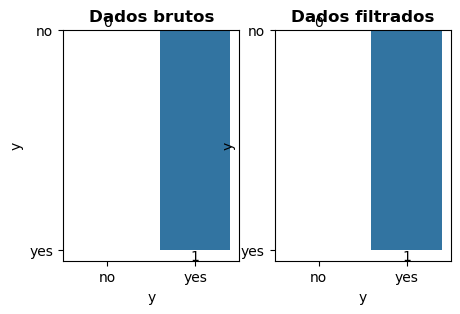

In [10]:
# Plotando os percentuais
fig, ax = plt.subplots(1, 2, figsize = (5,3))


sns.barplot(x = bank_raw_target_perc.index,
            y = 'y',
            data = bank_raw_target_perc,
            ax = ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Dados brutos',
                fontweight ="bold")


sns.barplot(x = bank_target_perc.index,
            y = 'y',
            data = bank_target_perc,
            ax = ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Dados filtrados',
                fontweight ="bold")